In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

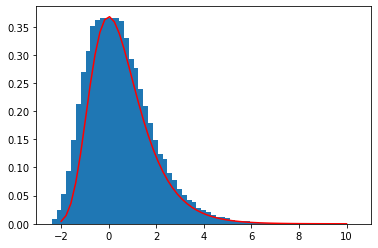

In [ ]:
#Testing simulation of gumbel vrandom ariable

N = 10**5
A, B, intervals = -2, 10, 60
width = (B - A)/intervals
freq = np.zeros(intervals)

for i in range(N):
  rnd = -np.log(-np.log(np.random.uniform(0,1)))
  index = (rnd + 2) * 5
  if (index >= 0 and index < intervals):
    freq[int(index)] += 1

freq = freq/(N * width)
#freq[0] = # of things between -2 and -1.99
xvalues = np.linspace(A, B, intervals)

yGumbel = np.exp(-(xvalues + np.exp(-xvalues)))


plt.bar(xvalues, freq)
plt.plot(xvalues, yGumbel, color = "r")
plt.show()

In [ ]:
#generate last passage percolation times

def calcLPT2(n,m):
  #simulate gumbel distributed edge weigths, H = horizantal, V = vertical,  by quantile function
  T = np.zeros((m+1,n+1))
  U = -np.log(-np.log(np.random.random((m + 1, n + 1))))
  V = -np.log(-np.log(np.random.random((m + 1, n + 1))))

  T[1][1] = -np.log(-np.log(np.random.uniform(0,1)))
  for x in range(2,m+1):
    T[x][1] = T[x-1][1] + U[x][1]
  
  for y in range(2,n+1):
    T[1][y] = T[1][x-1] + V[1][y]
  
  for x in range(2,m+1):
    for y in range(2,n+1):
      T[x][y] = max(T[x-1][y] + U[x][y], T[x][y-1] + V[x][y])
  
  return T[m][n]

In [ ]:
#calculate standard deviation of the values

def stdev(n, N):    
  values = np.zeros(N)
  valuesSIG = np.zeros(N)

  for i in range(N):
    values[i] = calcLPT2(n,n) - 4*n
    valuesSIG[i] = values[i] + 0.073 * n
  #plt.hist(values, 30)
  #plt.show()
  return stats.stdev(values), stats.stdev(valuesSIG)

In [ ]:
#plot graphs of standard deviations

nValues = np.linspace(500,1000,6,int)
print(nValues)
N = 100
STDEVs = np.zeros(len(nValues))
STDEVsSIG = np.zeros(len(nValues))

for n in nValues:
  print(n)
  STDEVs[int((int(n)-500)/100)], STDEVsSIG[int((int(n)-500)/100)]= stdev(int(n), int(N))

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.plot(nValues, STDEVs)
plt.subplot(1, 2, 2)
plt.plot(nValues, STDEVsSIG)

plt.show()

In [ ]:
#plot log of standard deviations compared to other logarithimic functions to calculate offset

logSTD = np.log(STDEVs)
logSTDSIG = np.log(STDEVsSIG)
logN = np.log(nValues)

plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.plot(logN, logSTD)
plt.plot(logN, logN * (1/3), color = "r")
plt.plot(logN, logN * (1/3) + np.log(2.563), color = "g")
# a, b = np.polyfit(logN, logSTD, 1)
# print("Offset for 4n: ", b)


plt.subplot(1, 2, 2)
plt.plot(logN, logSTDSIG)
plt.plot(logN, logN * (1/3), color = "r")
plt.plot(logN, logN * (1/3) + np.log(2.563), color = "g")

# a, b = np.polyfit(logN, logSTDSIG, 1)
# print("Offset for sigma n: ", b)

plt.show()

In [ ]:
#imported python program to simulate the GUE tracy widom distribution

from __future__ import division
import numpy as np
from scipy.interpolate import interp1d
from scipy.misc import derivative
from scipy.optimize import brentq

__all__ = ['TracyWidom']
__version__ = '0.3.0'

_digits_1 = b'\xc6\'\x00\x00\xd1(\x00\x00\xe2)\x00\x00\xf9*\x00\x00\x16,\x00\x009-\x00\x00c.\x00\x00\x93/\x00\x00\xc90\x00\x00\x062\x00\x00J3\x00\x00\x944\x00\x00\xe65\x00\x00>7\x00\x00\x9e8\x00\x00\x05:\x00\x00s;\x00\x00\xe9<\x00\x00f>\x00\x00\xeb?\x00\x00xA\x00\x00\rC\x00\x00\xa9D\x00\x00NF\x00\x00\xfbG\x00\x00\xb1I\x00\x00oK\x00\x005M\x00\x00\x05O\x00\x00\xddP\x00\x00\xbeR\x00\x00\xa8T\x00\x00\x9bV\x00\x00\x98X\x00\x00\x9eZ\x00\x00\xae\\\x00\x00\xc7^\x00\x00\xea`\x00\x00\x17c\x00\x00Ne\x00\x00\x8fg\x00\x00\xdai\x00\x000l\x00\x00\x90n\x00\x00\xfap\x00\x00ps\x00\x00\xf0u\x00\x00|x\x00\x00\x12{\x00\x00\xb4}\x00\x00a\x80\x00\x00\x19\x83\x00\x00\xdd\x85\x00\x00\xad\x88\x00\x00\x88\x8b\x00\x00o\x8e\x00\x00c\x91\x00\x00b\x94\x00\x00n\x97\x00\x00\x87\x9a\x00\x00\xab\x9d\x00\x00\xdd\xa0\x00\x00\x1b\xa4\x00\x00f\xa7\x00\x00\xbe\xaa\x00\x00#\xae\x00\x00\x95\xb1\x00\x00\x14\xb5\x00\x00\xa1\xb8\x00\x00<\xbc\x00\x00\xe4\xbf\x00\x00\x9a\xc3\x00\x00]\xc7\x00\x00/\xcb\x00\x00\x0e\xcf\x00\x00\xfc\xd2\x00\x00\xf8\xd6\x00\x00\x03\xdb\x00\x00\x1c\xdf\x00\x00C\xe3\x00\x00y\xe7\x00\x00\xbe\xeb\x00\x00\x12\xf0\x00\x00u\xf4\x00\x00\xe6\xf8\x00\x00g\xfd\x00\x00\xf7\x01\x01\x00\x97\x06\x01\x00E\x0b\x01\x00\x04\x10\x01\x00\xd1\x14\x01\x00\xaf\x19\x01\x00\x9c\x1e\x01\x00\x99#\x01\x00\xa6(\x01\x00\xc3-\x01\x00\xf02\x01\x00-8\x01\x00z=\x01\x00\xd7B\x01\x00EH\x01\x00\xc3M\x01\x00RS\x01\x00\xf1X\x01\x00\xa0^\x01\x00`d\x01\x001j\x01\x00\x13p\x01\x00\x05v\x01\x00\x08|\x01\x00\x1c\x82\x01\x00A\x88\x01\x00v\x8e\x01\x00\xbd\x94\x01\x00\x15\x9b\x01\x00}\xa1\x01\x00\xf7\xa7\x01\x00\x82\xae\x01\x00\x1e\xb5\x01\x00\xcb\xbb\x01\x00\x8a\xc2\x01\x00Y\xc9\x01\x00:\xd0\x01\x00,\xd7\x01\x00/\xde\x01\x00C\xe5\x01\x00i\xec\x01\x00\xa0\xf3\x01\x00\xe8\xfa\x01\x00A\x02\x02\x00\xab\t\x02\x00\'\x11\x02\x00\xb4\x18\x02\x00R \x02\x00\x02(\x02\x00\xc2/\x02\x00\x947\x02\x00w?\x02\x00jG\x02\x00oO\x02\x00\x85W\x02\x00\xac_\x02\x00\xe4g\x02\x00-p\x02\x00\x87x\x02\x00\xf1\x80\x02\x00l\x89\x02\x00\xf8\x91\x02\x00\x95\x9a\x02\x00B\xa3\x02\x00\x00\xac\x02\x00\xce\xb4\x02\x00\xad\xbd\x02\x00\x9c\xc6\x02\x00\x9c\xcf\x02\x00\xab\xd8\x02\x00\xcb\xe1\x02\x00\xfb\xea\x02\x00:\xf4\x02\x00\x8a\xfd\x02\x00\xe9\x06\x03\x00Y\x10\x03\x00\xd7\x19\x03\x00f#\x03\x00\x03-\x03\x00\xb06\x03\x00l@\x03\x008J\x03\x00\x12T\x03\x00\xfb]\x03\x00\xf3g\x03\x00\xfaq\x03\x00\x0f|\x03\x002\x86\x03\x00d\x90\x03\x00\xa4\x9a\x03\x00\xf2\xa4\x03\x00N\xaf\x03\x00\xb8\xb9\x03\x00/\xc4\x03\x00\xb4\xce\x03\x00G\xd9\x03\x00\xe6\xe3\x03\x00\x93\xee\x03\x00L\xf9\x03\x00\x12\x04\x04\x00\xe5\x0e\x04\x00\xc4\x19\x04\x00\xb0$\x04\x00\xa8/\x04\x00\xab:\x04\x00\xbbE\x04\x00\xd6P\x04\x00\xfd[\x04\x00/g\x04\x00lr\x04\x00\xb4}\x04\x00\x07\x89\x04\x00e\x94\x04\x00\xcd\x9f\x04\x00?\xab\x04\x00\xbc\xb6\x04\x00B\xc2\x04\x00\xd3\xcd\x04\x00l\xd9\x04\x00\x0f\xe5\x04\x00\xbc\xf0\x04\x00q\xfc\x04\x00/\x08\x05\x00\xf6\x13\x05\x00\xc5\x1f\x05\x00\x9c+\x05\x00|7\x05\x00cC\x05\x00RO\x05\x00H[\x05\x00Fg\x05\x00Js\x05\x00V\x7f\x05\x00h\x8b\x05\x00\x80\x97\x05\x00\x9f\xa3\x05\x00\xc3\xaf\x05\x00\xee\xbb\x05\x00\x1e\xc8\x05\x00T\xd4\x05\x00\x8e\xe0\x05\x00\xce\xec\x05\x00\x13\xf9\x05\x00\\\x05\x06\x00\xa9\x11\x06\x00\xfb\x1d\x06\x00P*\x06\x00\xa96\x06\x00\x06C\x06\x00fO\x06\x00\xc9[\x06\x00/h\x06\x00\x98t\x06\x00\x03\x81\x06\x00q\x8d\x06\x00\xe0\x99\x06\x00Q\xa6\x06\x00\xc4\xb2\x06\x009\xbf\x06\x00\xae\xcb\x06\x00%\xd8\x06\x00\x9c\xe4\x06\x00\x14\xf1\x06\x00\x8c\xfd\x06\x00\x05\n\x07\x00}\x16\x07\x00\xf5"\x07\x00m/\x07\x00\xe3;\x07\x00ZH\x07\x00\xceT\x07\x00Ba\x07\x00\xb4m\x07\x00%z\x07\x00\x93\x86\x07\x00\x00\x93\x07\x00j\x9f\x07\x00\xd2\xab\x07\x007\xb8\x07\x00\x99\xc4\x07\x00\xf8\xd0\x07\x00S\xdd\x07\x00\xac\xe9\x07\x00\x00\xf6\x07\x00Q\x02\x08\x00\x9e\x0e\x08\x00\xe6\x1a\x08\x00*\'\x08\x00i3\x08\x00\xa4?\x08\x00\xd9K\x08\x00\nX\x08\x005d\x08\x00Zp\x08\x00z|\x08\x00\x94\x88\x08\x00\xa8\x94\x08\x00\xb5\xa0\x08\x00\xbc\xac\x08\x00\xbd\xb8\x08\x00\xb7\xc4\x08\x00\xaa\xd0\x08\x00\x95\xdc\x08\x00z\xe8\x08\x00W\xf4\x08\x00-\x00\t\x00\xfb\x0b\t\x00\xc1\x17\t\x00\x7f#\t\x004/\t\x00\xe2:\t\x00\x87F\t\x00#R\t\x00\xb6]\t\x00Ai\t\x00\xc2t\t\x00:\x80\t\x00\xa9\x8b\t\x00\x0e\x97\t\x00j\xa2\t\x00\xbc\xad\t\x00\x04\xb9\t\x00B\xc4\t\x00v\xcf\t\x00\x9f\xda\t\x00\xbf\xe5\t\x00\xd3\xf0\t\x00\xdd\xfb\t\x00\xdc\x06\n\x00\xd1\x11\n\x00\xba\x1c\n\x00\x98\'\n\x00k2\n\x003=\n\x00\xefG\n\x00\xa0R\n\x00E]\n\x00\xdfg\n\x00lr\n\x00\xee|\n\x00d\x87\n\x00\xcd\x91\n\x00+\x9c\n\x00|\xa6\n\x00\xc1\xb0\n\x00\xf9\xba\n\x00%\xc5\n\x00D\xcf\n\x00W\xd9\n\x00]\xe3\n\x00V\xed\n\x00B\xf7\n\x00!\x01\x0b\x00\xf3\n\x0b\x00\xb8\x14\x0b\x00p\x1e\x0b\x00\x1b(\x0b\x00\xb81\x0b\x00H;\x0b\x00\xcbD\x0b\x00@N\x0b\x00\xa8W\x0b\x00\x02a\x0b\x00Oj\x0b\x00\x8es\x0b\x00\xc0|\x0b\x00\xe3\x85\x0b\x00\xf9\x8e\x0b\x00\x02\x98\x0b\x00\xfc\xa0\x0b\x00\xe9\xa9\x0b\x00\xc7\xb2\x0b\x00\x98\xbb\x0b\x00[\xc4\x0b\x00\x10\xcd\x0b\x00\xb7\xd5\x0b\x00P\xde\x0b\x00\xdb\xe6\x0b\x00X\xef\x0b\x00\xc7\xf7\x0b\x00(\x00\x0c\x00{\x08\x0c\x00\xbf\x10\x0c\x00\xf6\x18\x0c\x00\x1e!\x0c\x009)\x0c\x00E1\x0c\x00C9\x0c\x003A\x0c\x00\x15I\x0c\x00\xe9P\x0c\x00\xaeX\x0c\x00f`\x0c\x00\x0fh\x0c\x00\xabo\x0c\x008w\x0c\x00\xb7~\x0c\x00(\x86\x0c\x00\x8c\x8d\x0c\x00\xe1\x94\x0c\x00(\x9c\x0c\x00a\xa3\x0c\x00\x8c\xaa\x0c\x00\xa9\xb1\x0c\x00\xb8\xb8\x0c\x00\xb9\xbf\x0c\x00\xad\xc6\x0c\x00\x92\xcd\x0c\x00j\xd4\x0c\x004\xdb\x0c\x00\xf0\xe1\x0c\x00\x9e\xe8\x0c\x00?\xef\x0c\x00\xd2\xf5\x0c\x00W\xfc\x0c\x00\xcf\x02\r\x009\t\r\x00\x96\x0f\r\x00\xe5\x15\r\x00\'\x1c\r\x00["\r\x00\x82(\r\x00\x9b.\r\x00\xa84\r\x00\xa7:\r\x00\x99@\r\x00}F\r\x00UL\r\x00 R\r\x00\xddW\r\x00\x8e]\r\x002c\r\x00\xc9h\r\x00Sn\r\x00\xd0s\r\x00Ay\r\x00\xa5~\r\x00\xfc\x83\r\x00G\x89\r\x00\x86\x8e\r\x00\xb8\x93\r\x00\xde\x98\r\x00\xf7\x9d\r\x00\x04\xa3\r\x00\x05\xa8\r\x00\xfa\xac\r\x00\xe3\xb1\r\x00\xc0\xb6\r\x00\x91\xbb\r\x00V\xc0\r\x00\x10\xc5\r\x00\xbd\xc9\r\x00_\xce\r\x00\xf6\xd2\r\x00\x81\xd7\r\x00\x00\xdc\r\x00t\xe0\r\x00\xdd\xe4\r\x00:\xe9\r\x00\x8c\xed\r\x00\xd3\xf1\r\x00\x0f\xf6\r\x00@\xfa\r\x00f\xfe\r\x00\x82\x02\x0e\x00\x92\x06\x0e\x00\x98\n\x0e\x00\x93\x0e\x0e\x00\x83\x12\x0e\x00i\x16\x0e\x00E\x1a\x0e\x00\x16\x1e\x0e\x00\xdd!\x0e\x00\x99%\x0e\x00L)\x0e\x00\xf4,\x0e\x00\x920\x0e\x00\'4\x0e\x00\xb17\x0e\x002;\x0e\x00\xa9>\x0e\x00\x16B\x0e\x00zE\x0e\x00\xd4H\x0e\x00%L\x0e\x00lO\x0e\x00\xaaR\x0e\x00\xdfU\x0e\x00\x0bY\x0e\x00-\\\x0e\x00G_\x0e\x00Wb\x0e\x00_e\x0e\x00^h\x0e\x00Tk\x0e\x00Bn\x0e\x00\'q\x0e\x00\x03t\x0e\x00\xd7v\x0e\x00\xa3y\x0e\x00f|\x0e\x00!\x7f\x0e\x00\xd4\x81\x0e\x00\x7f\x84\x0e\x00!\x87\x0e\x00\xbc\x89\x0e\x00O\x8c\x0e\x00\xda\x8e\x0e\x00]\x91\x0e\x00\xd9\x93\x0e\x00M\x96\x0e\x00\xba\x98\x0e\x00\x1f\x9b\x0e\x00|\x9d\x0e\x00\xd2\x9f\x0e\x00!\xa2\x0e\x00i\xa4\x0e\x00\xaa\xa6\x0e\x00\xe3\xa8\x0e\x00\x16\xab\x0e\x00B\xad\x0e\x00f\xaf\x0e\x00\x84\xb1\x0e\x00\x9b\xb3\x0e\x00\xac\xb5\x0e\x00\xb6\xb7\x0e\x00\xb9\xb9\x0e\x00\xb6\xbb\x0e\x00\xad\xbd\x0e\x00\x9d\xbf\x0e\x00\x86\xc1\x0e\x00j\xc3\x0e\x00G\xc5\x0e\x00\x1f\xc7\x0e\x00\xf0\xc8\x0e\x00\xbb\xca\x0e\x00\x80\xcc\x0e\x00@\xce\x0e\x00\xfa\xcf\x0e\x00\xad\xd1\x0e\x00\\\xd3\x0e\x00\x04\xd5\x0e\x00\xa7\xd6\x0e\x00E\xd8\x0e\x00\xdd\xd9\x0e\x00p\xdb\x0e\x00\xfd\xdc\x0e\x00\x85\xde\x0e\x00\x08\xe0\x0e\x00\x86\xe1\x0e\x00\xff\xe2\x0e\x00r\xe4\x0e\x00\xe1\xe5\x0e\x00J\xe7\x0e\x00\xaf\xe8\x0e\x00\x0f\xea\x0e\x00j\xeb\x0e\x00\xc1\xec\x0e\x00\x12\xee\x0e\x00`\xef\x0e\x00\xa8\xf0\x0e\x00\xec\xf1\x0e\x00,\xf3\x0e\x00g\xf4\x0e\x00\x9e\xf5\x0e\x00\xd0\xf6\x0e\x00\xff\xf7\x0e\x00)\xf9\x0e\x00N\xfa\x0e\x00p\xfb\x0e\x00\x8e\xfc\x0e\x00\xa8\xfd\x0e\x00\xbd\xfe\x0e\x00\xcf\xff\x0e\x00\xdd\x00\x0f\x00\xe7\x01\x0f\x00\xed\x02\x0f\x00\xf0\x03\x0f\x00\xef\x04\x0f\x00\xea\x05\x0f\x00\xe2\x06\x0f\x00\xd6\x07\x0f\x00\xc6\x08\x0f\x00\xb3\t\x0f\x00\x9d\n\x0f\x00\x83\x0b\x0f\x00f\x0c\x0f\x00F\r\x0f\x00"\x0e\x0f\x00\xfb\x0e\x0f\x00\xd1\x0f\x0f\x00\xa4\x10\x0f\x00s\x11\x0f\x00@\x12\x0f\x00\n\x13\x0f\x00\xd0\x13\x0f\x00\x94\x14\x0f\x00U\x15\x0f\x00\x12\x16\x0f\x00\xcd\x16\x0f\x00\x86\x17\x0f\x00;\x18\x0f\x00\xee\x18\x0f\x00\x9e\x19\x0f\x00K\x1a\x0f\x00\xf6\x1a\x0f\x00\x9e\x1b\x0f\x00D\x1c\x0f\x00\xe7\x1c\x0f\x00\x87\x1d\x0f\x00&\x1e\x0f\x00\xc1\x1e\x0f\x00[\x1f\x0f\x00\xf2\x1f\x0f\x00\x86 \x0f\x00\x19!\x0f\x00\xa9!\x0f\x007"\x0f\x00\xc2"\x0f\x00L#\x0f\x00\xd3#\x0f\x00X$\x0f\x00\xdc$\x0f\x00]%\x0f\x00\xdc%\x0f\x00Y&\x0f\x00\xd4&\x0f\x00M\'\x0f\x00\xc4\'\x0f\x00:(\x0f\x00\xad(\x0f\x00\x1f)\x0f\x00\x8f)\x0f\x00\xfd)\x0f\x00i*\x0f\x00\xd4*\x0f\x00=+\x0f\x00\xa4+\x0f\x00\t,\x0f\x00m,\x0f\x00\xcf,\x0f\x000-\x0f\x00\x8f-\x0f\x00\xed-\x0f\x00I.\x0f\x00\xa3.\x0f\x00\xfc.\x0f\x00T/\x0f\x00\xaa/\x0f\x00\xff/\x0f\x00R0\x0f\x00\xa40\x0f\x00\xf50\x0f\x00D1\x0f\x00\x921\x0f\x00\xdf1\x0f\x00*2\x0f\x00t2\x0f\x00\xbd2\x0f\x00\x053\x0f\x00L3\x0f\x00\x913\x0f\x00\xd53\x0f\x00\x184\x0f\x00Z4\x0f\x00\x9b4\x0f\x00\xda4\x0f\x00\x195\x0f\x00W5\x0f\x00\x935\x0f\x00\xcf5\x0f\x00\t6\x0f\x00C6\x0f\x00{6\x0f\x00\xb36\x0f\x00\xe96\x0f\x00\x1f7\x0f\x00S7\x0f\x00\x877\x0f\x00\xba7\x0f\x00\xec7\x0f\x00\x1d8\x0f\x00N8\x0f\x00}8\x0f\x00\xac8\x0f\x00\xda8\x0f\x00\x079\x0f\x0039\x0f\x00^9\x0f\x00\x899\x0f\x00\xb39\x0f\x00\xdc9\x0f\x00\x05:\x0f\x00,:\x0f\x00T:\x0f\x00z:\x0f\x00\xa0:\x0f\x00\xc5:\x0f\x00\xe9:\x0f\x00\r;\x0f\x000;\x0f\x00R;\x0f\x00t;\x0f\x00\x96;\x0f\x00\xb6;\x0f\x00\xd6;\x0f\x00\xf6;\x0f\x00\x15<\x0f\x003<\x0f\x00Q<\x0f\x00n<\x0f\x00\x8b<\x0f\x00\xa7<\x0f\x00\xc3<\x0f\x00\xde<\x0f\x00\xf9<\x0f\x00\x13=\x0f\x00-=\x0f\x00F=\x0f\x00_=\x0f\x00w=\x0f\x00\x8f=\x0f\x00\xa7=\x0f\x00\xbe=\x0f\x00\xd4=\x0f\x00\xeb=\x0f\x00\x00>\x0f\x00\x16>\x0f\x00+>\x0f\x00?>\x0f\x00T>\x0f\x00g>\x0f\x00{>\x0f\x00\x8e>\x0f\x00\xa1>\x0f\x00\xb3>\x0f\x00\xc5>\x0f\x00\xd7>\x0f\x00\xe8>\x0f\x00\xfa>\x0f\x00\n?\x0f\x00\x1b?\x0f\x00+?\x0f\x00;?\x0f\x00J?\x0f\x00Y?\x0f\x00h?\x0f\x00w?\x0f\x00\x85?\x0f\x00\x93?\x0f\x00\xa1?\x0f\x00\xaf?\x0f\x00\xbc?\x0f\x00\xc9?\x0f\x00\xd6?\x0f\x00\xe2?\x0f\x00\xef?\x0f\x00\xfb?\x0f\x00\x07@\x0f\x00\x12@\x0f\x00\x1e@\x0f\x00)@\x0f\x004@\x0f\x00'
_digits_2 = b'g\x15\x00\x00;\x16\x00\x00\x16\x17\x00\x00\xf9\x17\x00\x00\xe2\x18\x00\x00\xd4\x19\x00\x00\xcd\x1a\x00\x00\xcf\x1b\x00\x00\xd8\x1c\x00\x00\xeb\x1d\x00\x00\x05\x1f\x00\x00) \x00\x00V!\x00\x00\x8c"\x00\x00\xcc#\x00\x00\x16%\x00\x00i&\x00\x00\xc7\'\x00\x000)\x00\x00\xa3*\x00\x00!,\x00\x00\xab-\x00\x00@/\x00\x00\xe10\x00\x00\x8d2\x00\x00G4\x00\x00\x0c6\x00\x00\xdf7\x00\x00\xbe9\x00\x00\xab;\x00\x00\xa6=\x00\x00\xae?\x00\x00\xc5A\x00\x00\xeaC\x00\x00\x1eF\x00\x00aH\x00\x00\xb3J\x00\x00\x15M\x00\x00\x86O\x00\x00\x08R\x00\x00\x9bT\x00\x00>W\x00\x00\xf2Y\x00\x00\xb8\\\x00\x00\x8f_\x00\x00yb\x00\x00te\x00\x00\x83h\x00\x00\xa4k\x00\x00\xd8n\x00\x00 r\x00\x00|u\x00\x00\xecx\x00\x00p|\x00\x00\t\x80\x00\x00\xb7\x83\x00\x00{\x87\x00\x00T\x8b\x00\x00C\x8f\x00\x00H\x93\x00\x00d\x97\x00\x00\x97\x9b\x00\x00\xe1\x9f\x00\x00B\xa4\x00\x00\xbb\xa8\x00\x00L\xad\x00\x00\xf6\xb1\x00\x00\xb8\xb6\x00\x00\x93\xbb\x00\x00\x87\xc0\x00\x00\x95\xc5\x00\x00\xbd\xca\x00\x00\xff\xcf\x00\x00[\xd5\x00\x00\xd1\xda\x00\x00c\xe0\x00\x00\x0f\xe6\x00\x00\xd7\xeb\x00\x00\xbb\xf1\x00\x00\xbb\xf7\x00\x00\xd6\xfd\x00\x00\x0e\x04\x01\x00c\n\x01\x00\xd5\x10\x01\x00d\x17\x01\x00\x10\x1e\x01\x00\xd9$\x01\x00\xc0+\x01\x00\xc62\x01\x00\xe99\x01\x00+A\x01\x00\x8bH\x01\x00\nP\x01\x00\xa8W\x01\x00e_\x01\x00Ag\x01\x00=o\x01\x00Xw\x01\x00\x92\x7f\x01\x00\xed\x87\x01\x00g\x90\x01\x00\x02\x99\x01\x00\xbc\xa1\x01\x00\x97\xaa\x01\x00\x92\xb3\x01\x00\xae\xbc\x01\x00\xea\xc5\x01\x00G\xcf\x01\x00\xc4\xd8\x01\x00b\xe2\x01\x00 \xec\x01\x00\xff\xf5\x01\x00\xff\xff\x01\x00 \n\x02\x00b\x14\x02\x00\xc4\x1e\x02\x00G)\x02\x00\xeb3\x02\x00\xb0>\x02\x00\x95I\x02\x00\x9aT\x02\x00\xc1_\x02\x00\x07k\x02\x00nv\x02\x00\xf6\x81\x02\x00\x9d\x8d\x02\x00e\x99\x02\x00M\xa5\x02\x00T\xb1\x02\x00{\xbd\x02\x00\xc1\xc9\x02\x00\'\xd6\x02\x00\xac\xe2\x02\x00P\xef\x02\x00\x13\xfc\x02\x00\xf5\x08\x03\x00\xf5\x15\x03\x00\x13#\x03\x00O0\x03\x00\xa8=\x03\x00\x1fK\x03\x00\xb4X\x03\x00ef\x03\x003t\x03\x00\x1d\x82\x03\x00#\x90\x03\x00E\x9e\x03\x00\x83\xac\x03\x00\xdb\xba\x03\x00N\xc9\x03\x00\xdc\xd7\x03\x00\x84\xe6\x03\x00E\xf5\x03\x00 \x04\x04\x00\x14\x13\x04\x00 "\x04\x00D1\x04\x00\x81@\x04\x00\xd4O\x04\x00?_\x04\x00\xc0n\x04\x00W~\x04\x00\x04\x8e\x04\x00\xc6\x9d\x04\x00\x9d\xad\x04\x00\x88\xbd\x04\x00\x87\xcd\x04\x00\x99\xdd\x04\x00\xbe\xed\x04\x00\xf5\xfd\x04\x00?\x0e\x05\x00\x99\x1e\x05\x00\x05/\x05\x00\x81?\x05\x00\rP\x05\x00\xa8`\x05\x00Sq\x05\x00\x0b\x82\x05\x00\xd1\x92\x05\x00\xa5\xa3\x05\x00\x85\xb4\x05\x00q\xc5\x05\x00i\xd6\x05\x00l\xe7\x05\x00z\xf8\x05\x00\x91\t\x06\x00\xb2\x1a\x06\x00\xdc+\x06\x00\x0e=\x06\x00HN\x06\x00\x89_\x06\x00\xd1p\x06\x00\x1f\x82\x06\x00r\x93\x06\x00\xca\xa4\x06\x00\'\xb6\x06\x00\x87\xc7\x06\x00\xeb\xd8\x06\x00Q\xea\x06\x00\xb9\xfb\x06\x00#\r\x07\x00\x8e\x1e\x07\x00\xf9/\x07\x00dA\x07\x00\xceR\x07\x007d\x07\x00\x9eu\x07\x00\x03\x87\x07\x00e\x98\x07\x00\xc3\xa9\x07\x00\x1e\xbb\x07\x00s\xcc\x07\x00\xc4\xdd\x07\x00\x0f\xef\x07\x00T\x00\x08\x00\x91\x11\x08\x00\xc8"\x08\x00\xf73\x08\x00\x1eE\x08\x00;V\x08\x00Pg\x08\x00[x\x08\x00[\x89\x08\x00P\x9a\x08\x00;\xab\x08\x00\x19\xbc\x08\x00\xeb\xcc\x08\x00\xb0\xdd\x08\x00h\xee\x08\x00\x13\xff\x08\x00\xaf\x0f\t\x00= \t\x00\xbc0\t\x00+A\t\x00\x8aQ\t\x00\xd9a\t\x00\x17r\t\x00D\x82\t\x00`\x92\t\x00i\xa2\t\x00a\xb2\t\x00E\xc2\t\x00\x17\xd2\t\x00\xd5\xe1\t\x00\x7f\xf1\t\x00\x15\x01\n\x00\x96\x10\n\x00\x02 \n\x00Z/\n\x00\x9c>\n\x00\xc8M\n\x00\xdd\\\n\x00\xddk\n\x00\xc5z\n\x00\x97\x89\n\x00Q\x98\n\x00\xf4\xa6\n\x00\x7f\xb5\n\x00\xf2\xc3\n\x00L\xd2\n\x00\x8e\xe0\n\x00\xb7\xee\n\x00\xc8\xfc\n\x00\xbe\n\x0b\x00\x9c\x18\x0b\x00`&\x0b\x00\n4\x0b\x00\x9aA\x0b\x00\x10O\x0b\x00k\\\x0b\x00\xaci\x0b\x00\xd3v\x0b\x00\xde\x83\x0b\x00\xcf\x90\x0b\x00\xa4\x9d\x0b\x00_\xaa\x0b\x00\xfe\xb6\x0b\x00\x82\xc3\x0b\x00\xea\xcf\x0b\x007\xdc\x0b\x00h\xe8\x0b\x00}\xf4\x0b\x00v\x00\x0c\x00T\x0c\x0c\x00\x15\x18\x0c\x00\xbb#\x0c\x00E/\x0c\x00\xb2:\x0c\x00\x04F\x0c\x009Q\x0c\x00R\\\x0c\x00Pg\x0c\x001r\x0c\x00\xf6|\x0c\x00\x9e\x87\x0c\x00+\x92\x0c\x00\x9c\x9c\x0c\x00\xf0\xa6\x0c\x00)\xb1\x0c\x00F\xbb\x0c\x00G\xc5\x0c\x00+\xcf\x0c\x00\xf5\xd8\x0c\x00\xa2\xe2\x0c\x004\xec\x0c\x00\xaa\xf5\x0c\x00\x04\xff\x0c\x00D\x08\r\x00g\x11\r\x00p\x1a\r\x00]#\r\x000,\r\x00\xe74\r\x00\x84=\r\x00\x06F\r\x00mN\r\x00\xbaV\r\x00\xec^\r\x00\x04g\r\x00\x03o\r\x00\xe7v\r\x00\xb1~\r\x00b\x86\r\x00\xf9\x8d\r\x00w\x95\r\x00\xdc\x9c\r\x00(\xa4\r\x00Z\xab\r\x00t\xb2\r\x00v\xb9\r\x00_\xc0\r\x000\xc7\r\x00\xe9\xcd\r\x00\x8a\xd4\r\x00\x14\xdb\r\x00\x86\xe1\r\x00\xe0\xe7\r\x00$\xee\r\x00P\xf4\r\x00f\xfa\r\x00e\x00\x0e\x00N\x06\x0e\x00!\x0c\x0e\x00\xde\x11\x0e\x00\x84\x17\x0e\x00\x16\x1d\x0e\x00\x92"\x0e\x00\xf9\'\x0e\x00J-\x0e\x00\x872\x0e\x00\xb07\x0e\x00\xc4<\x0e\x00\xc4A\x0e\x00\xafF\x0e\x00\x88K\x0e\x00LP\x0e\x00\xfdT\x0e\x00\x9bY\x0e\x00&^\x0e\x00\x9fb\x0e\x00\x04g\x0e\x00Xk\x0e\x00\x99o\x0e\x00\xc9s\x0e\x00\xe6w\x0e\x00\xf3{\x0e\x00\xed\x7f\x0e\x00\xd7\x83\x0e\x00\xb0\x87\x0e\x00x\x8b\x0e\x000\x8f\x0e\x00\xd7\x92\x0e\x00o\x96\x0e\x00\xf6\x99\x0e\x00n\x9d\x0e\x00\xd6\xa0\x0e\x00/\xa4\x0e\x00y\xa7\x0e\x00\xb4\xaa\x0e\x00\xe0\xad\x0e\x00\xfe\xb0\x0e\x00\x0e\xb4\x0e\x00\x0f\xb7\x0e\x00\x03\xba\x0e\x00\xe9\xbc\x0e\x00\xc1\xbf\x0e\x00\x8c\xc2\x0e\x00J\xc5\x0e\x00\xfb\xc7\x0e\x00\x9f\xca\x0e\x006\xcd\x0e\x00\xc1\xcf\x0e\x00@\xd2\x0e\x00\xb3\xd4\x0e\x00\x1a\xd7\x0e\x00u\xd9\x0e\x00\xc4\xdb\x0e\x00\t\xde\x0e\x00B\xe0\x0e\x00p\xe2\x0e\x00\x93\xe4\x0e\x00\xac\xe6\x0e\x00\xba\xe8\x0e\x00\xbe\xea\x0e\x00\xb7\xec\x0e\x00\xa7\xee\x0e\x00\x8d\xf0\x0e\x00i\xf2\x0e\x00;\xf4\x0e\x00\x05\xf6\x0e\x00\xc5\xf7\x0e\x00{\xf9\x0e\x00)\xfb\x0e\x00\xcf\xfc\x0e\x00k\xfe\x0e\x00\xff\xff\x0e\x00\x8b\x01\x0f\x00\x0f\x03\x0f\x00\x8a\x04\x0f\x00\xfe\x05\x0f\x00j\x07\x0f\x00\xce\x08\x0f\x00+\n\x0f\x00\x80\x0b\x0f\x00\xce\x0c\x0f\x00\x15\x0e\x0f\x00U\x0f\x0f\x00\x8e\x10\x0f\x00\xc1\x11\x0f\x00\xed\x12\x0f\x00\x12\x14\x0f\x001\x15\x0f\x00J\x16\x0f\x00\\\x17\x0f\x00i\x18\x0f\x00o\x19\x0f\x00p\x1a\x0f\x00k\x1b\x0f\x00a\x1c\x0f\x00Q\x1d\x0f\x00<\x1e\x0f\x00!\x1f\x0f\x00\x02 \x0f\x00\xdd \x0f\x00\xb3!\x0f\x00\x85"\x0f\x00Q#\x0f\x00\x19$\x0f\x00\xdd$\x0f\x00\x9c%\x0f\x00V&\x0f\x00\x0c\'\x0f\x00\xbe\'\x0f\x00l(\x0f\x00\x16)\x0f\x00\xbc)\x0f\x00^*\x0f\x00\xfc*\x0f\x00\x96+\x0f\x00-,\x0f\x00\xc0,\x0f\x00P-\x0f\x00\xdc-\x0f\x00e.\x0f\x00\xea.\x0f\x00m/\x0f\x00\xec/\x0f\x00h0\x0f\x00\xe10\x0f\x00W1\x0f\x00\xcb1\x0f\x00;2\x0f\x00\xa92\x0f\x00\x143\x0f\x00|3\x0f\x00\xe23\x0f\x00E4\x0f\x00\xa64\x0f\x00\x045\x0f\x00`5\x0f\x00\xba5\x0f\x00\x116\x0f\x00g6\x0f\x00\xba6\x0f\x00\x0b7\x0f\x00Z7\x0f\x00\xa67\x0f\x00\xf17\x0f\x00:8\x0f\x00\x828\x0f\x00\xc78\x0f\x00\n9\x0f\x00L9\x0f\x00\x8c9\x0f\x00\xcb9\x0f\x00\x08:\x0f\x00C:\x0f\x00|:\x0f\x00\xb5:\x0f\x00\xeb:\x0f\x00!;\x0f\x00T;\x0f\x00\x87;\x0f\x00\xb8;\x0f\x00\xe8;\x0f\x00\x16<\x0f\x00D<\x0f\x00p<\x0f\x00\x9a<\x0f\x00\xc4<\x0f\x00\xed<\x0f\x00\x14=\x0f\x00;=\x0f\x00`=\x0f\x00\x85=\x0f\x00\xa8=\x0f\x00\xca=\x0f\x00\xec=\x0f\x00\x0c>\x0f\x00,>\x0f\x00K>\x0f\x00i>\x0f\x00\x86>\x0f\x00\xa2>\x0f\x00\xbe>\x0f\x00\xd8>\x0f\x00\xf2>\x0f\x00\x0c?\x0f\x00$?\x0f\x00<?\x0f\x00S?\x0f\x00j?\x0f\x00\x80?\x0f\x00\x95?\x0f\x00\xaa?\x0f\x00\xbe?\x0f\x00\xd1?\x0f\x00\xe4?\x0f\x00\xf6?\x0f\x00\x08@\x0f\x00\x1a@\x0f\x00+@\x0f\x00;@\x0f\x00K@\x0f\x00Z@\x0f\x00i@\x0f\x00x@\x0f\x00\x86@\x0f\x00\x94@\x0f\x00\xa1@\x0f\x00\xae@\x0f\x00\xba@\x0f\x00\xc6@\x0f\x00\xd2@\x0f\x00\xde@\x0f\x00\xe9@\x0f\x00\xf4@\x0f\x00\xfe@\x0f\x00\x08A\x0f\x00\x12A\x0f\x00\x1cA\x0f\x00%A\x0f\x00.A\x0f\x007A\x0f\x00?A\x0f\x00GA\x0f\x00OA\x0f\x00WA\x0f\x00^A\x0f\x00fA\x0f\x00mA\x0f\x00sA\x0f\x00zA\x0f\x00\x80A\x0f\x00\x87A\x0f\x00\x8dA\x0f\x00\x93A\x0f\x00\x98A\x0f\x00\x9eA\x0f\x00\xa3A\x0f\x00\xa8A\x0f\x00\xadA\x0f\x00\xb2A\x0f\x00\xb7A\x0f\x00\xbbA\x0f\x00\xbfA\x0f\x00\xc4A\x0f\x00\xc8A\x0f\x00\xccA\x0f\x00\xd0A\x0f\x00\xd3A\x0f\x00\xd7A\x0f\x00\xdaA\x0f\x00\xdeA\x0f\x00\xe1A\x0f\x00\xe4A\x0f\x00\xe7A\x0f\x00\xeaA\x0f\x00\xedA\x0f\x00\xf0A\x0f\x00\xf3A\x0f\x00\xf5A\x0f\x00\xf8A\x0f\x00\xfaA\x0f\x00\xfdA\x0f\x00\xffA\x0f\x00\x01B\x0f\x00\x03B\x0f\x00\x05B\x0f\x00\x07B\x0f\x00\tB\x0f\x00\x0bB\x0f\x00\rB\x0f\x00\x0fB\x0f\x00\x10B\x0f\x00\x12B\x0f\x00\x14B\x0f\x00\x15B\x0f\x00\x17B\x0f\x00\x18B\x0f\x00\x19B\x0f\x00\x1bB\x0f\x00\x1cB\x0f\x00\x1dB\x0f\x00\x1fB\x0f\x00 B\x0f\x00!B\x0f\x00"B\x0f\x00#B\x0f\x00$B\x0f\x00%B\x0f\x00&B\x0f\x00\'B\x0f\x00(B\x0f\x00)B\x0f\x00)B\x0f\x00*B\x0f\x00+B\x0f\x00,B\x0f\x00'
_digits_4 = b'\xfa\x19\x00\x00&\x1b\x00\x00_\x1c\x00\x00\xa4\x1d\x00\x00\xf5\x1e\x00\x00S \x00\x00\xbe!\x00\x007#\x00\x00\xbe$\x00\x00T&\x00\x00\xf8\'\x00\x00\xac)\x00\x00o+\x00\x00C-\x00\x00\'/\x00\x00\x1c1\x00\x00#3\x00\x00<5\x00\x00h7\x00\x00\xa69\x00\x00\xf8;\x00\x00^>\x00\x00\xd8@\x00\x00gC\x00\x00\x0cF\x00\x00\xc7H\x00\x00\x98K\x00\x00\x80N\x00\x00\x80Q\x00\x00\x97T\x00\x00\xc8W\x00\x00\x11[\x00\x00u^\x00\x00\xf2a\x00\x00\x8ae\x00\x00>i\x00\x00\x0em\x00\x00\xfap\x00\x00\x03u\x00\x00*y\x00\x00n}\x00\x00\xd2\x81\x00\x00U\x86\x00\x00\xf8\x8a\x00\x00\xbb\x8f\x00\x00\x9f\x94\x00\x00\xa4\x99\x00\x00\xcc\x9e\x00\x00\x16\xa4\x00\x00\x84\xa9\x00\x00\x15\xaf\x00\x00\xcb\xb4\x00\x00\xa5\xba\x00\x00\xa5\xc0\x00\x00\xcb\xc6\x00\x00\x17\xcd\x00\x00\x8a\xd3\x00\x00$\xda\x00\x00\xe7\xe0\x00\x00\xd2\xe7\x00\x00\xe6\xee\x00\x00$\xf6\x00\x00\x8b\xfd\x00\x00\x1d\x05\x01\x00\xda\x0c\x01\x00\xc2\x14\x01\x00\xd6\x1c\x01\x00\x16%\x01\x00\x82-\x01\x00\x1c6\x01\x00\xe3>\x01\x00\xd8G\x01\x00\xfbP\x01\x00MZ\x01\x00\xcdc\x01\x00|m\x01\x00[w\x01\x00j\x81\x01\x00\xa9\x8b\x01\x00\x18\x96\x01\x00\xb7\xa0\x01\x00\x88\xab\x01\x00\x89\xb6\x01\x00\xbb\xc1\x01\x00\x1f\xcd\x01\x00\xb4\xd8\x01\x00{\xe4\x01\x00t\xf0\x01\x00\x9e\xfc\x01\x00\xfa\x08\x02\x00\x88\x15\x02\x00H"\x02\x00:/\x02\x00^<\x02\x00\xb4I\x02\x00;W\x02\x00\xf4d\x02\x00\xdfr\x02\x00\xfc\x80\x02\x00J\x8f\x02\x00\xc9\x9d\x02\x00y\xac\x02\x00Z\xbb\x02\x00l\xca\x02\x00\xae\xd9\x02\x00 \xe9\x02\x00\xc2\xf8\x02\x00\x93\x08\x03\x00\x93\x18\x03\x00\xc2(\x03\x00\x1f9\x03\x00\xaaI\x03\x00bZ\x03\x00Gk\x03\x00Y|\x03\x00\x96\x8d\x03\x00\x00\x9f\x03\x00\x93\xb0\x03\x00R\xc2\x03\x009\xd4\x03\x00J\xe6\x03\x00\x84\xf8\x03\x00\xe5\n\x04\x00m\x1d\x04\x00\x1b0\x04\x00\xefB\x04\x00\xe8U\x04\x00\x05i\x04\x00F|\x04\x00\xa9\x8f\x04\x00.\xa3\x04\x00\xd3\xb6\x04\x00\x99\xca\x04\x00~\xde\x04\x00\x81\xf2\x04\x00\xa2\x06\x05\x00\xdf\x1a\x05\x007/\x05\x00\xabC\x05\x007X\x05\x00\xddl\x05\x00\x9a\x81\x05\x00o\x96\x05\x00X\xab\x05\x00W\xc0\x05\x00i\xd5\x05\x00\x8e\xea\x05\x00\xc4\xff\x05\x00\x0b\x15\x06\x00b*\x06\x00\xc7?\x06\x009U\x06\x00\xb8j\x06\x00B\x80\x06\x00\xd6\x95\x06\x00\x87\xab\x06\x00\x19\xc1\x06\x00\xc5\xd6\x06\x00w\xec\x06\x00-\x02\x07\x00\xe7\x17\x07\x00\xa4-\x07\x00bC\x07\x00!Y\x07\x00\xden\x07\x00\x9a\x84\x07\x00S\x9a\x07\x00\x08\xb0\x07\x00\xb8\xc5\x07\x00b\xdb\x07\x00\x04\xf1\x07\x00\x9f\x06\x08\x000\x1c\x08\x00\xb71\x08\x002G\x08\x00\xa1\\\x08\x00\x03r\x08\x00V\x87\x08\x00\x9a\x9c\x08\x00\xcd\xb1\x08\x00\xef\xc6\x08\x00\xff\xdb\x08\x00\xfc\xf0\x08\x00\xe4\x05\t\x00\xb8\x1a\t\x00u/\t\x00\x1cD\t\x00\xabX\t\x00!m\t\x00~\x81\t\x00\xc0\x95\t\x00\xe7\xa9\t\x00\xf3\xbd\t\x00\xe2\xd1\t\x00\xb3\xe5\t\x00f\xf9\t\x00\xfb\x0c\n\x00o \n\x00\xc43\n\x00\xf7F\n\x00\tZ\n\x00\xf8l\n\x00\xc5\x7f\n\x00n\x92\n\x00\xf3\xa4\n\x00S\xb7\n\x00\x8e\xc9\n\x00\xa4\xdb\n\x00\x93\xed\n\x00[\xff\n\x00\xfd\x10\x0b\x00v"\x0b\x00\xc83\x0b\x00\xf1D\x0b\x00\xf2U\x0b\x00\xc9f\x0b\x00vw\x0b\x00\xfa\x87\x0b\x00T\x98\x0b\x00\x83\xa8\x0b\x00\x87\xb8\x0b\x00a\xc8\x0b\x00\x0f\xd8\x0b\x00\x91\xe7\x0b\x00\xe9\xf6\x0b\x00\x14\x06\x0c\x00\x13\x15\x0c\x00\xe6#\x0c\x00\x8d2\x0c\x00\x07A\x0c\x00UO\x0c\x00w]\x0c\x00lk\x0c\x004y\x0c\x00\xd0\x86\x0c\x00?\x94\x0c\x00\x81\xa1\x0c\x00\x97\xae\x0c\x00\x80\xbb\x0c\x00=\xc8\x0c\x00\xcd\xd4\x0c\x001\xe1\x0c\x00i\xed\x0c\x00u\xf9\x0c\x00T\x05\r\x00\x08\x11\r\x00\x90\x1c\r\x00\xed\'\r\x00\x1e3\r\x00$>\r\x00\xffH\r\x00\xafS\r\x005^\r\x00\x91h\r\x00\xc2r\r\x00\xca|\r\x00\xa8\x86\r\x00^\x90\r\x00\xea\x99\r\x00M\xa3\r\x00\x88\xac\r\x00\x9c\xb5\r\x00\x87\xbe\r\x00K\xc7\r\x00\xe8\xcf\r\x00_\xd8\r\x00\xaf\xe0\r\x00\xd9\xe8\r\x00\xde\xf0\r\x00\xbd\xf8\r\x00w\x00\x0e\x00\r\x08\x0e\x00\x7f\x0f\x0e\x00\xcd\x16\x0e\x00\xf8\x1d\x0e\x00\xff$\x0e\x00\xe5+\x0e\x00\xa82\x0e\x00I9\x0e\x00\xc9?\x0e\x00(F\x0e\x00gL\x0e\x00\x85R\x0e\x00\x84X\x0e\x00c^\x0e\x00$d\x0e\x00\xc6i\x0e\x00Ko\x0e\x00\xb1t\x0e\x00\xfby\x0e\x00\'\x7f\x0e\x008\x84\x0e\x00,\x89\x0e\x00\x05\x8e\x0e\x00\xc3\x92\x0e\x00g\x97\x0e\x00\xf0\x9b\x0e\x00_\xa0\x0e\x00\xb5\xa4\x0e\x00\xf2\xa8\x0e\x00\x16\xad\x0e\x00"\xb1\x0e\x00\x17\xb5\x0e\x00\xf4\xb8\x0e\x00\xba\xbc\x0e\x00i\xc0\x0e\x00\x02\xc4\x0e\x00\x86\xc7\x0e\x00\xf4\xca\x0e\x00M\xce\x0e\x00\x92\xd1\x0e\x00\xc2\xd4\x0e\x00\xde\xd7\x0e\x00\xe7\xda\x0e\x00\xdd\xdd\x0e\x00\xc0\xe0\x0e\x00\x91\xe3\x0e\x00P\xe6\x0e\x00\xfd\xe8\x0e\x00\x98\xeb\x0e\x00#\xee\x0e\x00\x9d\xf0\x0e\x00\x07\xf3\x0e\x00a\xf5\x0e\x00\xab\xf7\x0e\x00\xe6\xf9\x0e\x00\x12\xfc\x0e\x000\xfe\x0e\x00?\x00\x0f\x00@\x02\x0f\x003\x04\x0f\x00\x19\x06\x0f\x00\xf2\x07\x0f\x00\xbe\t\x0f\x00}\x0b\x0f\x000\r\x0f\x00\xd8\x0e\x0f\x00s\x10\x0f\x00\x03\x12\x0f\x00\x88\x13\x0f\x00\x02\x15\x0f\x00q\x16\x0f\x00\xd6\x17\x0f\x001\x19\x0f\x00\x82\x1a\x0f\x00\xc9\x1b\x0f\x00\x07\x1d\x0f\x00;\x1e\x0f\x00g\x1f\x0f\x00\x8a \x0f\x00\xa4!\x0f\x00\xb6"\x0f\x00\xc0#\x0f\x00\xc2$\x0f\x00\xbd%\x0f\x00\xaf&\x0f\x00\x9b\'\x0f\x00\x7f(\x0f\x00])\x0f\x004*\x0f\x00\x04+\x0f\x00\xce+\x0f\x00\x91,\x0f\x00O-\x0f\x00\x06.\x0f\x00\xb8.\x0f\x00d/\x0f\x00\x0b0\x0f\x00\xad0\x0f\x00J1\x0f\x00\xe11\x0f\x00t2\x0f\x00\x023\x0f\x00\x8b3\x0f\x00\x104\x0f\x00\x914\x0f\x00\x0e5\x0f\x00\x865\x0f\x00\xfa5\x0f\x00k6\x0f\x00\xd86\x0f\x00A7\x0f\x00\xa77\x0f\x00\n8\x0f\x00i8\x0f\x00\xc58\x0f\x00\x1e9\x0f\x00t9\x0f\x00\xc69\x0f\x00\x17:\x0f\x00d:\x0f\x00\xaf:\x0f\x00\xf7:\x0f\x00<;\x0f\x00\x80;\x0f\x00\xc1;\x0f\x00\xff;\x0f\x00<<\x0f\x00v<\x0f\x00\xae<\x0f\x00\xe5<\x0f\x00\x19=\x0f\x00K=\x0f\x00|=\x0f\x00\xab=\x0f\x00\xd8=\x0f\x00\x04>\x0f\x00.>\x0f\x00W>\x0f\x00~>\x0f\x00\xa3>\x0f\x00\xc8>\x0f\x00\xea>\x0f\x00\x0c?\x0f\x00,?\x0f\x00L?\x0f\x00j?\x0f\x00\x87?\x0f\x00\xa2?\x0f\x00\xbd?\x0f\x00\xd7?\x0f\x00\xf0?\x0f\x00\x08@\x0f\x00\x1f@\x0f\x005@\x0f\x00J@\x0f\x00_@\x0f\x00r@\x0f\x00\x85@\x0f\x00\x97@\x0f\x00\xa9@\x0f\x00\xba@\x0f\x00\xca@\x0f\x00\xd9@\x0f\x00\xe8@\x0f\x00\xf6@\x0f\x00\x04A\x0f\x00\x11A\x0f\x00\x1eA\x0f\x00*A\x0f\x006A\x0f\x00AA\x0f\x00LA\x0f\x00VA\x0f\x00`A\x0f\x00jA\x0f\x00sA\x0f\x00|A\x0f\x00\x84A\x0f\x00\x8cA\x0f\x00\x94A\x0f\x00\x9bA\x0f\x00\xa2A\x0f\x00\xa9A\x0f\x00\xb0A\x0f\x00\xb6A\x0f\x00\xbcA\x0f\x00\xc2A\x0f\x00\xc7A\x0f\x00\xcdA\x0f\x00\xd2A\x0f\x00\xd7A\x0f\x00\xdbA\x0f\x00\xe0A\x0f\x00\xe4A\x0f\x00\xe8A\x0f\x00\xecA\x0f\x00\xf0A\x0f\x00\xf3A\x0f\x00'

_tau0 = 0.872371414954127 #2.**(1./24.) * exp(zeta'(-1))

_para_n = \
[[_tau0**0.5/2.**0.25,     1./24., 2.**(-0.5)/3., 1./16.], \
 [_tau0,                   1./12., 0,              1./8.], \
 [_tau0**0.5/2.**(38./48.), 1./6., -(2.**0.5)/3., 1./16.]]

_para_p = \
[[0.25/(np.pi**0.5), 0, 2./3., 0.75], \
 [1./(16.*np.pi),    0, 4./3., 1.5], \
 [1./(512.*np.pi),  0, 8./3., 3.0]]

def _f (x, N, a, b, c, u=0, v=0):
    s = x**1.5
    return N*np.exp(-s*(s*a+b))/x**c * (1.+(u+v/s)/s)

def _dlnf_dx(x, N, a, b, c, u=0, v=0):
    s = x**1.5
    return -(3.*a*s*s + 1.5*b*s + c + 1.5*(s*u+v+v)/((s+u)*s+v))/x

def _find_u_v (x, f, dlnf, N, a, b, c):
    #log f = log N - a x^3 - b x^1.5 - c log x + log1p ( (u+v/s)/s )
    s = x**1.5
    xd2 = x*2.*(dlnf - _dlnf_dx(x, N, a, b, c))
    vv = lambda uu : -s*((xd2+3.)*uu + xd2*s)/(xd2+6.)
    fu = lambda uu : f/_f(x, N, a, b, c, uu, vv(uu)) - 1.
    for k1, k2 in [(-1, 1), (-5, -3), (715, 725)]:
        try:
            u = brentq(fu, k1, k2, disp=False)
        except ValueError:
            continue
        else:
            break
    else:
        raise ValueError("Cannot find u with brentq")
    v = vv(u)
    return u, v

def _finv(y, N, a, b, c, u=0, v=0):
    # a * x**3 + b*x**1.5 + c * log x + log y - log N
    ya = np.asanyarray(y)
    xa = np.ones_like(ya)
    flag = (ya>0)
    logyn = np.log(ya[flag]/N)
    xa[~flag] = np.inf
    for i in range(3):
        ca =  np.log(xa[flag])*c + logyn - np.log1p(u/xa[flag]**1.5 + v/xa[flag]**3)
        xa[flag] = ((np.sqrt(b*b-4.*a*ca) -b)/(a*2.) if a else ca/(-b))**(2./3.)
    return xa

class TracyWidom(object):
    """
    Provide the Tracy-Widom distribution functions for beta = 1, 2, or 4.
    We use the tables in http://www.cl.cam.ac.uk/~aib29/TWinSplus.pdf
    and the asymptotics in http://arxiv.org/abs/1111.2761
    """
    def __init__(self, beta=2):
        """
        Construnct a TracyWidom class for a given beta.
        Parameters
        ----------
        beta : int, optional
            The beta value of the Tracy-Widom distribution.
            Can only be 1, 2, or 4; otherwise a ValueError will raise.
            Default value is 2.
        Returns
        -------
        A TracyWidom class instance with member functions cdf, pdf, and cdfinv.
        """
        b = int(beta)
        if b == 1:
            digits = _digits_1
            xlim = (-389, 360)
        elif b == 2:
            digits = _digits_2
            xlim = (-389, 250)
        elif b == 4:
            digits = _digits_4
            xlim = (-399, 70)
        else:
            raise ValueError("beta needs to be 1, 2, or 4.")

        self.beta = b
        ib = [1, 2, 4].index(b)

        x = np.arange(*xlim, dtype=np.int32).astype(float) * 1.e-2
        y = np.frombuffer(digits, dtype=np.int32).astype(float) * 1.e-6
        self.__xlim = (x[1], x[-2])
        self.__cdf    = interp1d(x, y, kind='cubic', bounds_error=False)

        dlnf = derivative(lambda xx: np.log(self.__cdf(-xx)), -x[1], \
                dx=3.33e-3, order=7)
        self.__para_n = _para_n[ib] \
                + list(_find_u_v(-x[1], y[1], dlnf, *_para_n[ib]))
        self.__asym_n = lambda xx: _f(-xx, *self.__para_n)
        self.__asym_inv_n = lambda yy: -(_finv(yy, *self.__para_n))

        dlnf = derivative(lambda xx: np.log(1.-self.__cdf(xx)), x[-2], \
                dx=3.33e-3, order=7)
        self.__para_p = _para_p[ib] + list(_find_u_v(x[-2], 1.-y[-2], dlnf, \
                *_para_p[ib]))
        self.__asym_p = lambda xx: 1.-_f(xx, *self.__para_p)
        self.__asym_inv_p = lambda yy: _finv(1.-yy, *self.__para_p)

        x = np.linspace(-8, 4, 2401)
        y = self.cdf(x)
        self.__ylim = (y[0], y[-1])
        self.__cdfinv = interp1d(self.cdf(x), x, bounds_error=False)

    def cdf(self, x):
        """
        Return the cumulative distribution function at x.
        cdf(x) = P(TW < x)
        Parameters
        ----------
        x : float or array-like
        Returns
        -------
        y : float or array-like
            y = cdf(x)
        """
        xa = np.asanyarray(x)
        scalar = (xa.ndim==0)
        if scalar: xa = xa.flatten()
        y = self.__cdf(xa)
        flag = xa < self.__xlim[0]
        y[flag] = self.__asym_n(xa[flag])
        flag = xa > self.__xlim[1]
        y[flag] = self.__asym_p(xa[flag])
        return y[0] if scalar else y

    def pdf(self, x):
        """
        Return the probability distribution function at x.
        pdf(x) = d P(TW < x) / dx.
        Parameters
        ----------
        x : float or array-like
        Returns
        -------
        y : float or array-like
            y = pdf(x)
        """
        xa = np.asanyarray(x)
        return derivative(self.cdf, xa, dx=0.08, order=5)

    def cdfinv(self, x):
        """
        Return the inverse cumulative distribution function at x.
        cdfinv(x) = cdf^{-1}(x)
        Parameters
        ----------
        x : float or array-like
            Only values in (0, 1) are valid.
        Returns
        -------
        y : float or array-like
            y = cdfinv(x)
        """
        xa = np.asanyarray(x)
        scalar = (xa.ndim==0)
        if scalar: xa = xa.flatten()
        y = self.__cdfinv(xa)
        flag = xa < self.__ylim[0]
        y[flag] = self.__asym_inv_n(xa[flag])
        flag = xa > self.__ylim[1]
        y[flag] = self.__asym_inv_p(xa[flag])
        return y[0] if scalar else y

In [ ]:
#graph last passage percolation times offset and scaled by a factor of N and N**(1/3), compared to the tracy widom distribution with dyson index beta = 2 (unitary)

N, n = 10**3, 400

values = np.zeros(N)
valuesC = np.zeros(N)

for i in range(N):
  if (i % 100 == 0):
    print(i)
  values[i] = calcLPT2(n,n) - 4*n
  valuesC[i] = values[i] + 0.073 * n


plt.figure(figsize = (32, 8))
plt.subplot(1, 4, 1)
plt.hist(values, 30)
plt.subplot(1, 4, 2)
plt.hist(values/(2.563 * (n**(1/3))), 30, density = True)
xVals = np.linspace(-10, 1, 34)
plt.plot(xVals, TracyWidom(beta = 2).pdf(xVals), color = "r")


plt.subplot(1, 4, 3)
plt.hist(valuesC, 30)
plt.subplot(1, 4, 4)
plt.hist(valuesC/(2.563 * (n**(1/3))), 30, density = True)
plt.plot(xVals, TracyWidom(beta = 2).pdf(xVals), color = "r")



plt.show()
